In [1]:

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/Users/kbansal/Downloads/KB/Python_files/Dataset/data1.csv',header = None)
labels = pd.read_csv('/Users/kbansal/Downloads/KB/Python_files/Dataset/label1.csv',header = None)

In [16]:
npdata = data.values   # to convert them to numpy otherwise they will be treated by pandas throughtout the code
nplabels = labels.values

In [3]:
  # we treat labels as index  and take that index column from identitiy matrix

In [6]:
num = np.max(nplabels)+1
oneHot = np.eye(num)[nplabels]  # fancy indexing (put index in list i.e. nplabels. and each index calls its row from identitiy matrix
print(oneHot.ndim)
print(oneHot.shape)

3
(20000, 1, 5)


In [7]:
print(np.max(npdata))

6.873800762086958


In [13]:
oneHot

array([[[0., 0., 0., 1., 0.]],

       [[0., 0., 1., 0., 0.]],

       [[0., 0., 1., 0., 0.]],

       ...,

       [[0., 0., 1., 0., 0.]],

       [[0., 0., 1., 0., 0.]],

       [[1., 0., 0., 0., 0.]]])

In [8]:
oneHot = np.reshape(oneHot,[20000,5])
print(oneHot)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [9]:
trainData, testData, trainLabel, testLabel = train_test_split(npdata,oneHot,train_size=0.8)
print(trainData.shape,testData.shape,trainLabel.shape,testLabel.shape)

(16000, 20) (4000, 20) (16000, 5) (4000, 5)


In [41]:
class MLP:
    def __init__(self,inputL,hiddenL,outputL):  # input layer, hidden layers, output layers
        self.length = len(hiddenL)
        self.weights = []
        self.bias = []

        self.weights.append(np.random.normal(0,1/np.sqrt(inputL),size=(inputL,hiddenL[0])))   #np.zeros((inputL,hiddenL[0]))
        self.bias.append(np.zeros((hiddenL[0],)))

        for i in range(1,len(hiddenL)):
            self.weights.append(np.random.normal(0,1/np.sqrt(hiddenL[i-1]),size=(hiddenL[i-1],hiddenL[i])))
            self.bias.append(np.zeros((hiddenL[i],)))

        self.weights.append(np.random.normal(0,1/np.sqrt(hiddenL[-1]),size=(hiddenL[-1],outputL)))
        self.bias.append(np.zeros((outputL,)))

        
    def activation(self,Z):
        return 1/(1+np.exp(-Z))

    def softmaxActivation(self,Z):
        temp = np.exp(Z)
        return temp/np.sum(temp,axis = 1,keepdims=True)

    def fit(self,X,y,lr = 0.01,epochs = 1000):
        loss_final = self.backward(X,y,lr,epochs)
        return loss_final

    def Acc(self,y,t):
        maxData = np.argmax(y,axis=1)
        maxLabel= np.argmax(t,axis=1)
        return np.mean(maxLabel==maxData)*100

    def costFn(self,y,t):
        return -(t*np.log(y))
        
    def forward(self,X):  # forward_propagation

        A= X
        self.output = [A]
        for i in range(len(self.weights)-1):
            Z = A@self.weights[i]+self.bias[i]
            A= self.activation(Z)
            self.output.append(A)

        Z = A@self.weights[-1]+self.bias[-1]
        A= self.softmaxActivation(Z)
        self.output.append(A)
            
        return A

    def derA(self,Z):   #derivative of activation function
        return Z*(1-Z)


    def backward(self,X,y,lr=0.01,epochs = 100):
        losses =[]
        for e in range(epochs):
            ypred = self.forward(X)

            delta = [ypred-y]
            gradw = [self.output[-2].T@delta[-1]]

            for i in range(len(self.weights)-1,0,-1):
                delta.append((delta[-1]@self.weights[i].T)*self.derA(self.output[i]))
                gradw.append(self.output[i-1].T@delta[-1])



            wn = len(self.weights)-1
            for i in range(len(gradw)):
                self.weights[wn] = self.weights[wn]-lr*gradw[i]
                self.bias[wn] = self.bias[wn]-lr*np.sum(delta[i],axis=0)
                wn -= 1

            loss = np.sum(self.costFn(ypred,y))/ypred.shape[0]
            print("Epoch:",e,"Train Loss:",loss,"Train Accuracy:",self.Acc(ypred,y))
            losses.append(loss)
        return losses

    
    def predict(self,X):
        ypred= self.forward(X)
        maxLabel = np.argmax(ypred,axis=1)
        return maxLabel


In [42]:
clf = MLP(trainData.shape[1],[40,30,60],trainLabel.shape[1])

In [43]:
loss = clf.fit(trainData,trainLabel,lr=0.0001,epochs = 1000)

Epoch: 0 Train Loss: 1.8383811522568732 Train Accuracy: 19.475
Epoch: 1 Train Loss: 3.6035612939612784 Train Accuracy: 19.75
Epoch: 2 Train Loss: 4.252522061212467 Train Accuracy: 20.10625
Epoch: 3 Train Loss: 2.820533696165525 Train Accuracy: 20.00625
Epoch: 4 Train Loss: 2.5106056208843377 Train Accuracy: 19.8375
Epoch: 5 Train Loss: 1.9416168857004794 Train Accuracy: 20.23125
Epoch: 6 Train Loss: 1.6702697042888879 Train Accuracy: 19.818749999999998
Epoch: 7 Train Loss: 1.6093613776988245 Train Accuracy: 23.7375
Epoch: 8 Train Loss: 1.607092665845962 Train Accuracy: 20.6875
Epoch: 9 Train Loss: 1.6064417135614406 Train Accuracy: 24.275
Epoch: 10 Train Loss: 1.6059076122607658 Train Accuracy: 28.006249999999998
Epoch: 11 Train Loss: 1.6053675231768734 Train Accuracy: 27.224999999999998
Epoch: 12 Train Loss: 1.6048094232626184 Train Accuracy: 28.287499999999998
Epoch: 13 Train Loss: 1.6042293472601101 Train Accuracy: 28.712500000000002
Epoch: 14 Train Loss: 1.6036237794775288 Train Ac

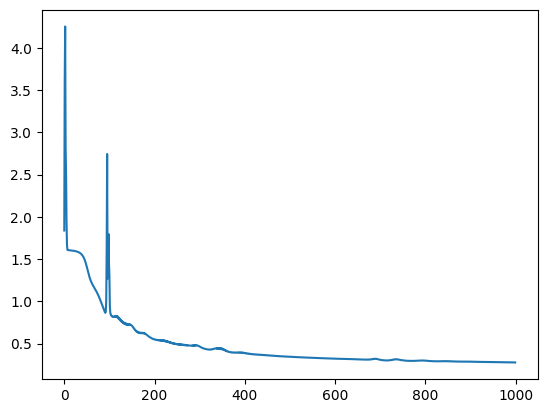

In [44]:
plt.plot(loss)

In [40]:
print(loss)

None


In [75]:
diabetes_data = pd.read_csv('/Users/kbansal/Downloads/KB/Python_files/diabetes.csv')

In [76]:
X = diabetes_data.drop(['Outcome'],axis = 1).values  # axis =1 is for column, 0 for row as default
y = diabetes_data['Outcome'].values

In [77]:
num = np.max(y)+1
oneHot = np.eye(num)[y]  # fancy indexing (put index in list i.e. nplabels. and each index calls its row from identitiy matrix
print(oneHot.ndim)
print(oneHot.shape)

2
(768, 2)


In [78]:
oneHot = np.reshape(oneHot,[768,2])

In [79]:
trainData, testData, trainLabel, testLabel = train_test_split(X,oneHot,train_size=0.8)
print(trainData.shape,testData.shape,trainLabel.shape,testLabel.shape)

(614, 8) (154, 8) (614, 2) (154, 2)


In [80]:
clf = MLP(trainData.shape[1],[40,30,60],trainLabel.shape[1])

In [81]:
loss = clf.fit(trainData,trainLabel,lr=0.00005,epochs = 1000)

Epoch: 0 Train Loss: 0.8800268874209376 Train Accuracy: 34.20195439739413
Epoch: 1 Train Loss: 0.7049070776372954 Train Accuracy: 34.20195439739413
Epoch: 2 Train Loss: 0.6574533619061179 Train Accuracy: 65.79804560260585
Epoch: 3 Train Loss: 0.6452475504210067 Train Accuracy: 65.79804560260585
Epoch: 4 Train Loss: 0.641915213722539 Train Accuracy: 65.79804560260585
Epoch: 5 Train Loss: 0.6409470211952977 Train Accuracy: 65.79804560260585
Epoch: 6 Train Loss: 0.6406437042934091 Train Accuracy: 65.79804560260585
Epoch: 7 Train Loss: 0.6405340190617366 Train Accuracy: 65.79804560260585
Epoch: 8 Train Loss: 0.6404821614864822 Train Accuracy: 65.79804560260585
Epoch: 9 Train Loss: 0.6404481913887259 Train Accuracy: 65.79804560260585
Epoch: 10 Train Loss: 0.6404202899518675 Train Accuracy: 65.79804560260585
Epoch: 11 Train Loss: 0.6403949901373999 Train Accuracy: 65.79804560260585
Epoch: 12 Train Loss: 0.640371302735324 Train Accuracy: 65.79804560260585
Epoch: 13 Train Loss: 0.6403489554597

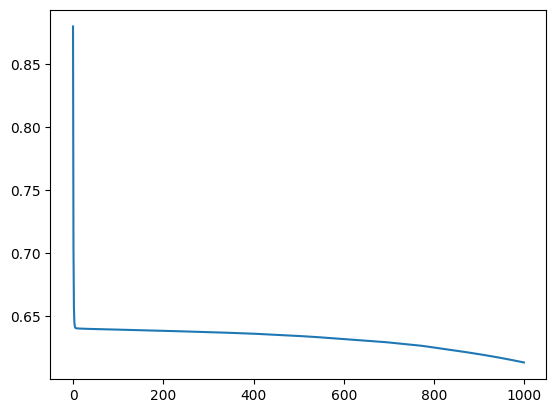

In [82]:
plt.plot(loss)

In [ ]:
#MLPclassifier
